# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

*Transformación a DataFrame de pandas*

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()              #En este df no está la variable target aún

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [5]:
df['MEDV'] = pd.DataFrame(boston.target)   #agregamos al df la variable target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.shape

(506, 14)

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Las variables TAX (Impuestos) y RAD (Indice de acceso a autopistas radiales) presentan una elevada correlación lineal positiva. 

<AxesSubplot:xlabel='CRIM', ylabel='Count'>

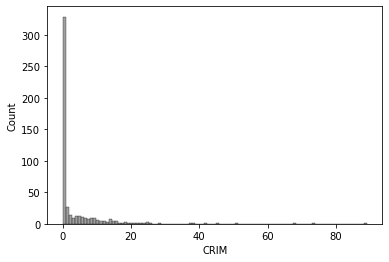

In [8]:
sns.histplot(df['CRIM'], color='gray')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


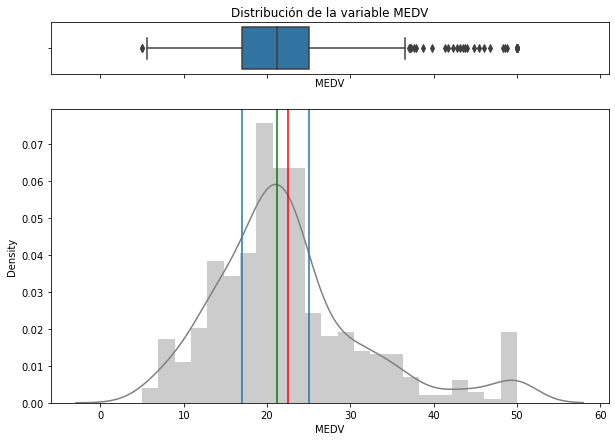

In [34]:
#Se divide el gráfico en dos partes

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(df.MEDV, ax=ax_box)
sns.distplot(df.MEDV, ax=ax_hist, kde=False, hist=False)
sns.distplot(df.MEDV, ax=ax_hist, kde=True, hist=True,norm_hist=False,color="gray")

plt.axvline(df.MEDV.quantile(0.25))
plt.axvline(df.MEDV.quantile(0.50),color='g')
plt.axvline(df.MEDV.mean(),color='red')
plt.axvline(df.MEDV.quantile(0.75))
 
ax_box.set_title("Distribución de la variable MEDV")
plt.show()


El histograma de la variable `MEDV` muestra una distribución que se aproxima a la forma de una gaussiana, sin embargo se puede observar un pequeño sesgo hacia la izquierda (asimetría derecha). 

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

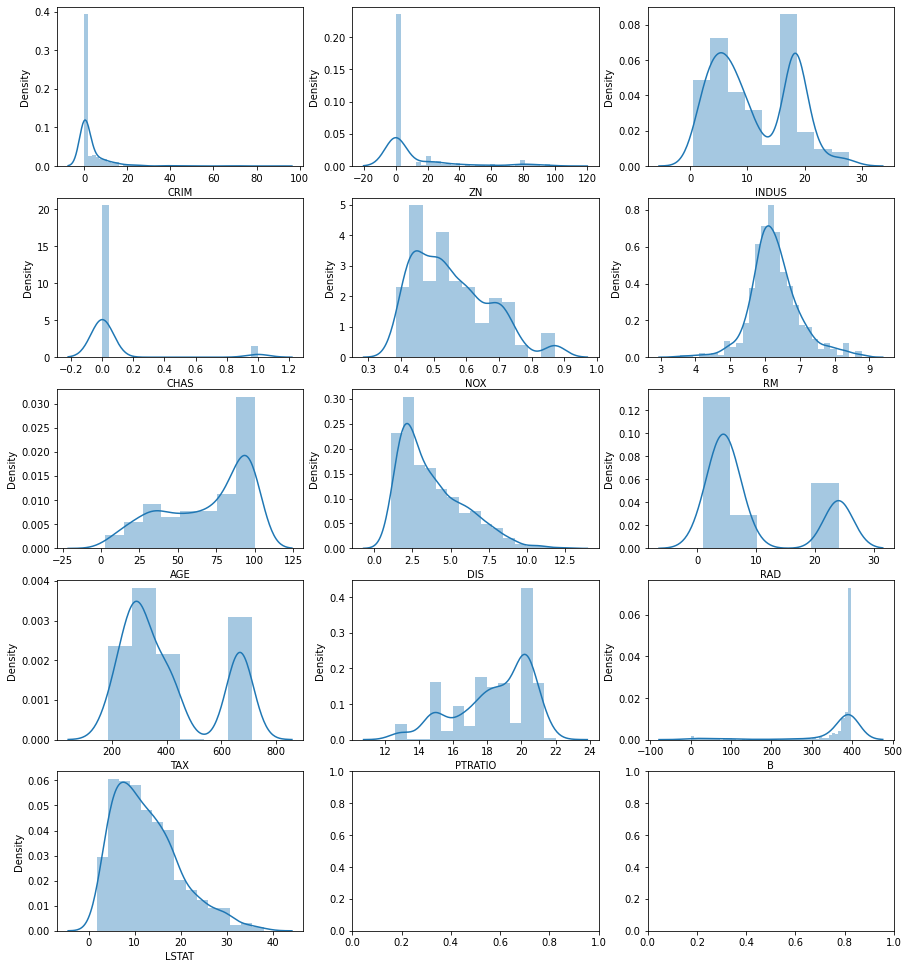

In [44]:
## Distribuciones de las variables predictoras

fig, ax=plt.subplots(5,3,figsize=(15,17))
sns.distplot(df.CRIM, ax=ax[0,0])
sns.distplot(df.ZN, ax=ax[0,1])
sns.distplot(df.INDUS, ax=ax[0,2])
sns.distplot(df.CHAS, ax=ax[1,0])
sns.distplot(df.NOX, ax=ax[1,1])
sns.distplot(df.RM, ax=ax[1,2])
sns.distplot(df.AGE, ax=ax[2,0])
sns.distplot(df.DIS, ax=ax[2,1])
sns.distplot(df.RAD, ax=ax[2,2])
sns.distplot(df.TAX, ax=ax[3,0])
sns.distplot(df.PTRATIO, ax=ax[3,1])
sns.distplot(df.B, ax=ax[3,2])
sns.distplot(df.LSTAT, ax=ax[4,0])

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [9]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1. El conjutno de datos refiere a precios de casas en Boston, y contiene información referida a atributos que estarían vinculados con el valor de las casas. La base de datos cuenta con 13 atributos (los cuales pueden ser numéricos o categóricos), más la variable objetivo que es el valor mediano de la casa, y 506 instancias (las cuales representarían observaciones sobre las cuales se tiene información, que servirán para entrenar el modelo y testearlo).
Cada registro de la base de datos describe un suburbio o una ciudad de Boston. Los datos se obtuvieron del Área Estadística Metropolitana Estándar de Boston (SMSA) en 1970. 

2. La variable objetivo a predecir es MEDV (Median value of owner-occupied homes in $1000's) la cual representa el valor mediano de las casas ocupadas por sus propios dueños en miles de dólares.

3. Para hacer la predicción se dispone de información de 13 atributos en total, los cuales presentan información sobre distintos tipos de características: 
- Características sociales, económicas y demográficas de la ciudad, como la tasa de criminalidad per cápita (CRIM), tasa de estudiantes por docente de la ciudad (PTRATIO), porcentaje de la población de menor nivel socio-económico (LSTAT), la tasa del impuesto al valor total de la propiedad por $ 10,000 (TAX), y una variable ligada a la proporción de población negra en la ciudad (calculada a partir de la siguiente fórmula: B= 1000(Bk - 0.63)^2 ).
- Características habitacionales, como la proporción de terrenos residenciales divididos en lotes de más de 25,000 pies cuadrados (ZN), proporción de negocios comerciales no minoristas por ciudad (INDUS), el número promedio de habitaciones por vivienda (RM), la proporción de unidades ocupadas por sus dueños que fueron construidas antes de 1940 (AGE)
-Características de tipo geográfico/ambiental:  la cercanía al río Charles (CHAS), concentración de óxidos nítricos (NOX), la distancia ponderada a 5 centros comerciales de Boston (DIS), índice de accesibilidad a las carreteras radiales  (circunvalación) (RAD).

4. A priori, uno podría pensar que algunas de las características de tipo geográfico, como el índice de accesibilidad, la distancia a los centros comerciales, y cercanía al río charles podrían tener mayor relevancia como determinantes de la variable a predecir. Asimismo, otras como la concentración de óxidos nítricos, la tasa de impuesto, la tasa de criminalidad, ratio estudiantes por docente, porcentaje de población de menor nivel socioeconómico podrían ser relevantes también. En cuanto a las características habitacionales, se destaca la posible relevancia de la proporción de negocios no minoristas, la proporción de casas ocupadas por sus dueños y la cantidad de habitaciones (proxi del tamaño de las casas). 

5. Por un lado, la base de datos no tienen valores missings, con lo cual no generaría la necesidad de realizar imputaciones de variables. Los valores de las features representan valores agregados a nivel del suburb o ciudad. 
Algunos de los problemas que se podrían identificar con la base de datos tiene que ver con consideraciones éticas de algunos de los atributos.  
Dos de las features podrían generar problemas éticos para la predicción del precio: tanto la que se encuentra vinculada al porcentaje de población negra como la que indica el porcentaje de la población de menor nivel socio-económico.

Por otra parte, se detectan **sesgos** **Riesgos?**     **PARA COMPLETAR**


## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

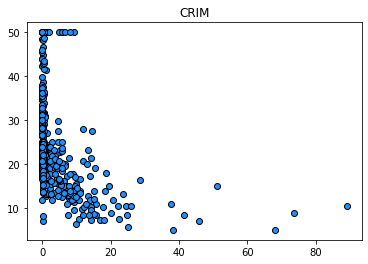

In [11]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

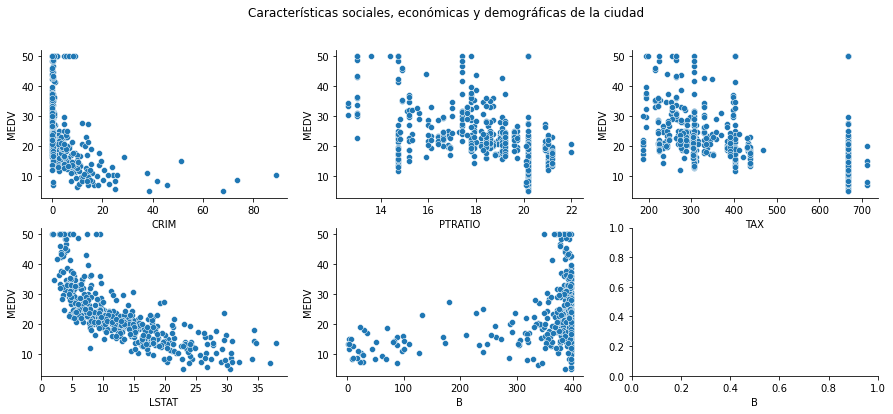

In [12]:
f, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,6))
plt.suptitle("Características sociales, económicas y demográficas de la ciudad")
sns.scatterplot(data=df, x='CRIM', y="MEDV", ax=axs[0,0])
plt.xlabel("Tasa de criminalidad")       #Falta algo para que se aplique el label
sns.scatterplot(data=df, x='PTRATIO', y="MEDV", ax=axs[0,1])
plt.xlabel("Estudiantes por docente")
sns.scatterplot(data=df, x='TAX', y="MEDV", ax=axs[0,2])
plt.xlabel("Impuestos")
sns.scatterplot(data=df, x='LSTAT', y="MEDV", ax=axs[1,0])
plt.xlabel("Población de nivel socioeconómico bajo")
sns.scatterplot(data=df, x='B', y="MEDV", ax=axs[1,1])
plt.xlabel("B")
sns.despine()
plt.show()

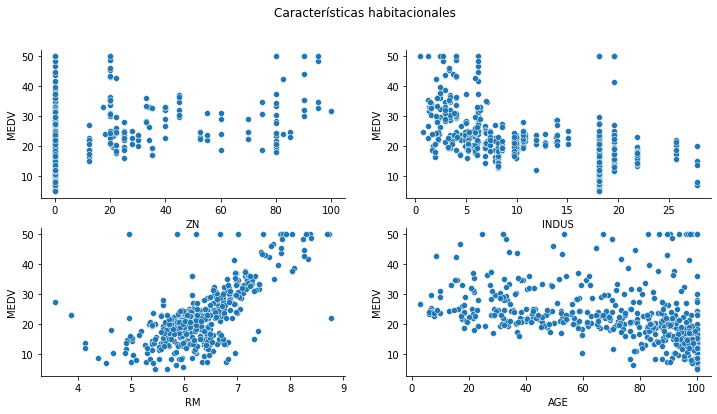

In [14]:
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
plt.suptitle("Características habitacionales")
sns.scatterplot(data=df, x='ZN', y="MEDV", ax=axs[0,0])
sns.scatterplot(data=df, x='INDUS', y="MEDV", ax=axs[0,1])
sns.scatterplot(data=df, x='RM', y="MEDV", ax=axs[1,0])
sns.scatterplot(data=df, x='AGE', y="MEDV", ax=axs[1,1])
sns.despine()
plt.show()


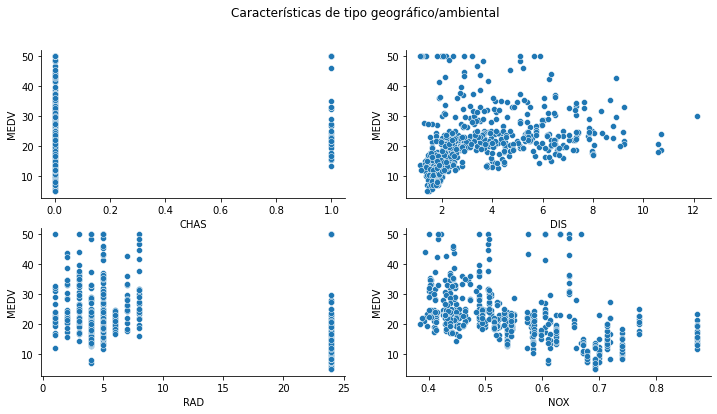

In [15]:
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
plt.suptitle("Características de tipo geográfico/ambiental")
sns.scatterplot(data=df, x='CHAS', y="MEDV", ax=axs[0,0])
sns.scatterplot(data=df, x='DIS', y="MEDV", ax=axs[0,1])
sns.scatterplot(data=df, x='RAD', y="MEDV", ax=axs[1,0])
sns.scatterplot(data=df, x='NOX', y="MEDV", ax=axs[1,1])
sns.despine()
plt.show()

**2. Atributos más explicativos para la predicción**

Los gráficos realizados anteriormente sugieren que el porcentaje de población de bajo nivel socio-económico sería una de los atributos que más se vincula con el valor de las casas (mientras mayor sea este porcentaje, menor será el valor de la casa).
La cantidad de habitaciones en las viviendas es otro de los atributos más relevantes (mientras mayor sea mayor el valor medio de las casas).
La tasas de criminalidad es otro, mientras mayor sea menor será el valor de la casa. No obstante, existe un numerosa cantidad de observaciones para las cuales la relación no sería concluyente (aquellas cuya tasa de criminalidad es muy baja)


<AxesSubplot:>

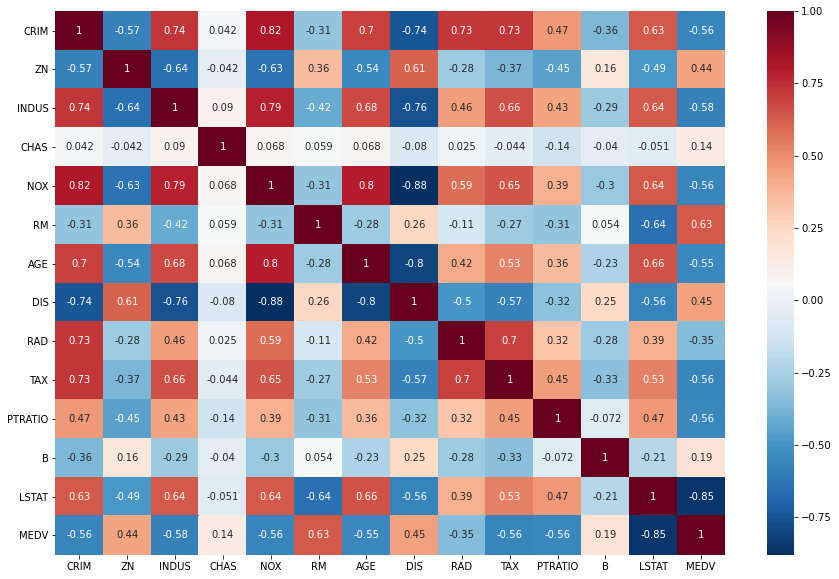

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr("spearman"),annot=True, cmap="RdBu_r")

**3. Orden de importancia de los atributos para explicar el valor medio de las casas**
1. LSTAT
2. RM
3. INDUS
4. NOX
5. TAX
6. CRIM
7. PTRATIO
8. AGE
9. DIS
10. ZN
11. RAD
12. B
13. RAD

#### Acá tengo una duda ...no es más común que la gente tenga más en cuenta la tasa de criminalidad que la contaminación aérea para comprar una casa?....de esta decisión depende de si sacamos CRIM o NOX ....yo sacaría NOX. Otra cosa, la correlación se hace solo entre las variables predictores, habría que sacar MEDV (LAU)

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [10]:
# 1. Resolver acá.    #VAMOS A UTILIZAR EL ATRIBUTO RM
feature = 'RM'  
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [11]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
model = lr
model.fit(X_train_f, y_train)

LinearRegression()

In [12]:
# 3. Predecir y evaluar acá.
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')  

Train error: 4.3e+01
Test error: 4.7e+01


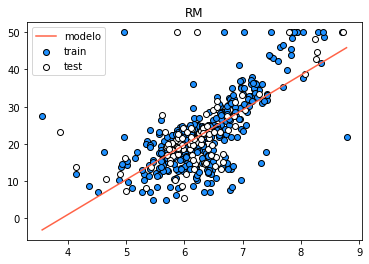

In [13]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

**5. Interpretación del resultado del modelo**

El modelo empleado no pareciera ser una muy buena representación, ya que se advierten errores de predicción de entrenamiento y testeo grandes en los extremos de la distribución de la cantidad de habitaciones, así como también para aquellas observaciones en las cuales se dan los valores medianos de las casas más altos. (esta última parte no la entendí- lau)

**Agregar más interpretación en función de los grafiquitos de distribución y valor de los errores que iba a agregar Esteban**

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [23]:
# 1. Resolver acá.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)                           
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

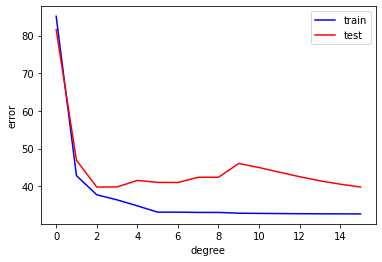

In [24]:
# 2. Graficar curvas de error acá.
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")                           
plt.show()                          #Coment FC: ómo decidimos cuál es el mejor modelo en base a esto? 

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.
degree =      #PONER EL GRADO DEL MEJOR MODELO
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train)

plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

Al final no apliqué transformaciones porque el error se hacía más grande, tendríamos que preguntarle a Nehuén (LAU)

In [24]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'RM')| (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

In [25]:
# 2. Resolver acá.
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True) 
lr.fit(X_train_fs, y_train)
y_train_pred=lr.predict(X_train_fs)
y_test_pred=lr.predict(X_test_fs)

In [26]:
lr.coef_

array([-0.14041301,  5.35345027, -0.56782244])

In [22]:
lr.intercept_

-3.4341330430813883

In [27]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 27.786405
Test error: 38.758313


Los resultados del modelo muestran una relación inversa de la tasa de criminalidad `CRIM` y el porcentaje de la población de menor nivel socio económico `LSTAT` con el precio estimado de las casas en Boston `MEDV`. Por otro lado, este modelo predice un incremento del precio de las casas a medida que aumenta el número de habitaciones por vivienda `RM`.
Tanto el error de entrenamiento como el de test disminuyeron con respecto al modelo que sólo tenía en cuenta la variable `RM`. Es decir que el modelo mejoró al agregar dos variables relevantes para la estimación del valor de las casas en Boston.

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.



In [28]:
# Se entrenó el modelo con todas las variables menos NOX y DIS que presentaron valores altos de correlación (ver más arriba)
selector =(boston['feature_names'] != "DIS") & (boston['feature_names'] != "NOX")  
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 11), (102, 11))

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True) 
lr.fit(X_train_fs, y_train)
y_train_pred=lr.predict(X_train_fs)
y_test_pred=lr.predict(X_test_fs)

In [30]:
lr.coef_

array([-0.09167904,  0.01279027,  0.05147898,  2.55893526,  4.25450196,
        0.01152068,  0.20804189, -0.0115054 , -1.04940638,  0.00923613,
       -0.50008677])

In [31]:
lr.intercept_

19.508765187654

In [32]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 21.626936
Test error: 38.525697


Luego de agregar el resto de variables al modelo (menos NOX y DIS), pudimos observar que el error de entrenamiento siguió disminuyendo, sin embargo el de test se mantuvo en valores similares. Es decir, que la diferencia entre ambos errores fue más grande en este modelo con respecto al que tuvo en cuenta solo las tres variables relevantes. Esto podría evidenciar un comienzo de overfitting debido a la complejización del modelo. Por lo que podríamos decir que el modelo que mejor predice el precio de las casas en Bostón es el que incluye `CRIM`, `RM` y `LSTAT` (complejidad intermedia).

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?